# Introduction to Gaia data

In this tutorial, we'll look at a globular cluster, 47 Tucanae. We'll see how to query Gaia data, and then do some basic calculations for 47 Tucanae.

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.coordinates import SkyCoord
import astropy.units as u

First, we look up the coordinates of the globular cluster 47 Tucanae:

In [ ]:
c = SkyCoord.from_name('47 Tuc')
print(c)

<SkyCoord (ICRS): (ra, dec) in deg
    (6.02232917, -72.08144444)>


Next, go to https://gea.esac.esa.int/archive/, click "Search," and go to the "Advanced (ADQL)" tab. Here, we'll run an ADQL query (ADQL is a query language like SQL):

    SELECT TOP 10000
     *
    FROM gaiaedr3.gaia_source
    WHERE 1=CONTAINS(
      POINT('ICRS', 6.02232917, -72.08144444),
    CIRCLE('ICRS',ra, dec, 0.25))

This will query sources in a 0.25 deg patch centered on 47 Tuc. Once the query is complete, download the results.

Note that I've inserted `TOP 10000` above to limit the results to the first 10000 matches. You can remove this to get the full query results.

Next, we open up the data table and take a look at what what is inside it:

In [ ]:
data = Table.read('result.vot.gz')

In [ ]:
data

solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,nu_eff_used_in_astrometry,pseudocolour,pseudocolour_error,ra_pseudocolour_corr,dec_pseudocolour_corr,parallax_pseudocolour_corr,pmra_pseudocolour_corr,pmdec_pseudocolour_corr,astrometric_matched_transits,visibility_periods_used,astrometric_sigma5d_max,matched_transits,new_matched_transits,matched_transits_removed,ipd_gof_harmonic_amplitude,ipd_gof_harmonic_phase,ipd_frac_multi_peak,ipd_frac_odd_win,ruwe,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_n_contaminated_transits,phot_bp_n_blended_transits,phot_rp_n_contaminated_transits,phot_rp_n_blended_transits,phot_proc_mode,phot_bp_rp_excess_factor,bp_rp,bp_g,g_rp,dr2_radial_velocity,dr2_radial_velocity_error,dr2_rv_nb_transits,dr2_rv_template_teff,dr2_rv_template_logg,dr2_rv_template_fe_h,l,b,ecl_lon,ecl_lat
,,,,yr,deg,mas,deg,mas,mas,mas,,mas.yr**-1,mas.yr**-1,mas.yr**-1,mas.yr**-1,mas.yr**-1,,,,,,,,,,,,,,,,,mas,,,,um**-1,um**-1,um**-1,,,,,,,,mas,,,,,deg,,,,,,,,deg,deg,deg,deg,,,'electron'.s**-1,'electron'.s**-1,,mag,,'electron'.s**-1,'electron'.s**-1,,mag,,'electron'.s**-1,'electron'.s**-1,,mag,,,,,,,mag,mag,mag,km.s**-1,km.s**-1,,K,log(cm.s**-2),'dex',deg,deg,deg,deg
int64,object,int64,int64,float64,float64,float32,float64,float32,float64,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,float32,float32,float32,float32,int16,bool,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,float32,int16,int16,int16,float32,float32,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,int16,float64,float32,float32,float32,int16,float64,float32,float32,float32,int16,float64,float32,float32,float32,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float64,float64,float64,float64
1636042515805110273,Gaia EDR3 4689643660613246592,4689643660613246592,767481269,2016.0,6.012985874890213,3.6050367,-71.99025539782122,5.4019704,--,--,--,--,--,--,--,--,-0.10342298,--,--,--,--,--,--,--,--,--,58,0,57,1,1.2776722,65.36875,1.7689201,0.53141165,3,False,--,--,--,--,--,--,--,--,7,5,10.746282,8,2,0,0.11067785,22.49528,0,0,--,0.37924471,0.8361588,0.39224353,0.6608724,31.028791,57.47055,40.30343,-28.57053,False,58,132.3230953476457,1.9035468,69.51397,20.383278,0,--,--,--,--,0,--,--,--,--,--,--,--,--,1,--,--,--,--,--,--,0,--,--,--,305.91864482856823,-44.97883999074066,311.41570612329645,-62.302293426471316
1636042515805110273,Gaia EDR3 4689643660613247616,4689643660613247616,31042085,2016.0,6.01474784067142,1.6881387,-71.9872209388885,1.7354871,--,--,--,--,--,--,--,--,-0.6198246,--,--,--,--,--,--,--,--,--,90,0,88,2,0.16621874,84.483665,0.0,0.0,3,False,--,--,--,--,--,--,--,--,11,10,4.081321,13,5,0,0.11277931,28.4803,0,0,--,0.23085493,0.61350477,0.20961452,0.4715074,32.287235,51.192833,30.93017,-22.790628,False,88,119.48859291785708,1.3796628,86.6071,20.494051,0,--,-

You can read about what these columns mean [here](https://gea.esac.esa.int/archive/documentation/GEDR3/Gaia_archive/chap_datamodel/sec_dm_main_tables/ssec_dm_gaia_source.html).

First, let's look at the density of these sources on the sky:

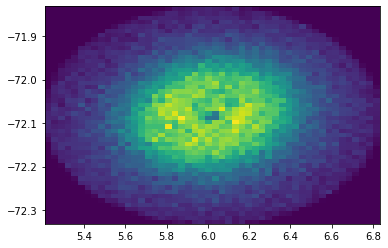

In [ ]:
plt.hist2d(
    data['ra'], data['dec'],
    bins=50
)
plt.show()

Is this the density distribution that you expect? What can explain this density pattern?

Let's take a look at the parallax distribution:

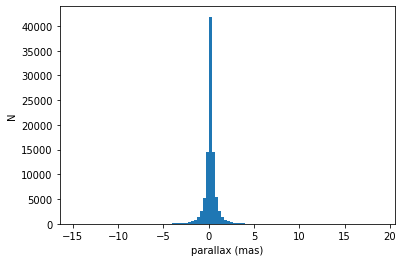

In [ ]:
plt.hist(data['parallax'], bins=100)
plt.xlabel('parallax (mas)')
plt.ylabel('N')
plt.show()

As you can see, many of the parallaxes are negative. This is because the parallaxes have measurement errors. These are accounted for in `parallax_error`. In order to calculate an average parallax for 47 Tuc, we can give less weight to parallaxes that have larger errors, and more weight to parallaxes with smaller errors.

The way to do this is through "inverse-variance weighting." This is done as follows:
$$
  \left< \varpi \right> = \sum_{i} \frac{\hat{\varpi}_i}{\sigma_i^2} \Bigg/ \sum_{i} \frac{1}{\sigma_i^2} \, ,
$$
where $\hat{\varpi}_i$ is the measured parallax of star $i$, and $\sigma_i$ is its uncertainty.

In order to deal with outliers, we will also add in a small error floor $\epsilon$, to each uncertainty, in quadrature:
$$
  \sigma_i^2 \rightarrow \sigma_i^2 + \epsilon^2 \, .
$$
We implement this below:

In [ ]:
eps = 0.01

plx_avg = np.average(data['parallax'], weights=1/(data['parallax_error']**2+eps**2))
print(plx_avg)

0.22353537988391725


We can estimate the distance to 47 Tuc using the fact that distance is inversely proportional to parallax:
$$
\frac{d}{1\,\mathrm{kpc}} = \frac{1\,\mathrm{mas}}{\varpi} \, .
$$

In [ ]:
d_est = 1/plx_avg
print(d_est)

4.473564768670193


This is an estimate of the distance to 47 Tuc in kiloparsecs.

## Next steps:

1. Plot a color-absolute-magnitude diagram of 47 Tuc.
2. Estimate the proper motion of 47 Tuc.

The color-absolute-magnitude diagram (CAMD) should have the BP-RP magnitude on the $x$-axis, and the G-band absolute magnitude on the $y$-axis. Recall that the absolute magnitude $M$ is related to the apparent magnitude $m$ and distance $d$ by
$$
  m = M + 5 \log_{10} \left( \frac{d}{10\,\mathrm{pc}} \right) \, .
$$
What stellar populations can you identify in the CAMD?